In [4]:
# load the data

import os
import glob 
from matplotlib.pyplot import rc_context
import seaborn as sns
import numpy as np
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()

import pickle  #upper threshold 값들을 저장하고 불러오기 위해서. 

h5ad_data = []
for file in glob.glob("*.h5ad"):  
    h5ad_data.append(file)  #All names of file with #.h5ad 

adata_file_name = h5ad_data  


In [5]:
n_data = len(adata_file_name)

adata_list = []


for i in range(n_data):
  
    print(i)    
    data_loaded = sc.read_h5ad(adata_file_name[i])
    data_loaded_transposed = data_loaded.transpose()
    
    adata_list.append(data_loaded_transposed)  #이곳에 데이터가 List 로 저장됨 

    
    
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


In [13]:
adata_file_name

['RNA-a732a72e79-CD45.h5ad',
 'RNA-a3bb0a02a9-Stroma.h5ad',
 'RNA-6afc2254f6-Tumor.h5ad',
 'RNA-f6514792ee-StromaCD45.h5ad',
 'RNA-9e05a910a0-Tumor.h5ad',
 'RNA-75bb7b7378-CD45.h5ad',
 'RNA-5beb60a390-Stroma.h5ad',
 'RNA-e3f3a05da7-Tumor.h5ad',
 'RNA-5beb60a390-Tumor.h5ad',
 'RNA-90f7522850-Tumor.h5ad',
 'RNA-b15339dae6-Tumor.h5ad',
 'RNA-e3f3a05da7-Stroma.h5ad',
 'RNA-75bb7b7378-Tumor.h5ad',
 'RNA-26c87cf199-Stroma.h5ad',
 'RNA-5e57cbf4e3-CD45.h5ad',
 'RNA-e5bcb3c95a-Tumor.h5ad',
 'RNA-05c133f08b-Stroma.h5ad',
 'RNA-26c87cf199-Tumor.h5ad',
 'RNA-f6514792ee-Tumor.h5ad',
 'RNA-5e57cbf4e3-Tumor.h5ad',
 'RNA-5beb60a390-CD45.h5ad',
 'RNA-e5bcb3c95a-StromaCD45.h5ad',
 'RNA-a732a72e79-Stroma.h5ad',
 'RNA-a3bb0a02a9-Tumor.h5ad',
 'RNA-15a334b60a-CD45.h5ad',
 'RNA-fbd6bc90f1-CD45.h5ad',
 'RNA-15a334b60a-Tumor.h5ad',
 'RNA-b15339dae6-StromaCD45.h5ad',
 'RNA-a3bb0a02a9-CD45.h5ad',
 'RNA-5e57cbf4e3-Stroma.h5ad',
 'RNA-6afc2254f6-CD45.h5ad',
 'RNA-6afc2254f6-Stroma.h5ad',
 'RNA-26c87cf199-CD45.h5a

In [6]:
for adata in adata_list:
    adata.var_names_make_unique()

In [7]:
adata_list[0]

AnnData object with n_obs × n_vars = 2824 × 22012

In [8]:
adata_file_name[5]

'RNA-75bb7b7378-CD45.h5ad'

In [ ]:
# make a code that decides the names of samples and type 

cd_order = 1
tumor_order = 1
stroma_order = 1
cd_st_ord = 1
adata_type_list = []
adata_sample_list = []
adata_sample_order = []


for file_name in adata_file_name:
    

    if 'CD45' and 'Stroma' in file_name:
        #print('yes')
        type_name = 'CD45Stroma'
        sample_id = 'StromaCD45'
        adata_sample_list.append(sample_id)
        adata_type_list.append(type_name)
        adata_sample_order.append(cd_st_ord)
        cd_st_ord = cd_st_ord + 1

        
    else:
        if 'CD45' in file_name:
            
            type_name = 'CD45'
            sample_id = 'CD45'
            adata_sample_list.append(sample_id)
            adata_type_list.append(type_name)
            adata_sample_order.append(cd_order)
            cd_order = cd_order + 1
            
        elif 'Stroma' in file_name:
            type_name = 'Stroma'
            sample_id = 'Stroma'
            adata_sample_list.append(sample_id)
            adata_type_list.append(type_name)
            adata_sample_order.append(stroma_order)
            stroma_order = stroma_order + 1
        else:
            type_name = 'Tumor'
            sample_id = 'Tumor'
            adata_sample_list.append(sample_id)
            adata_type_list.append(type_name)
            adata_sample_order.append(tumor_order)
            tumor_order = tumor_order + 1
            
sample_id = []

for i in range(len(adata_type_list)):
    sample_id.append(adata_type_list[i]+ '-' + str(adata_sample_order[i]))
   


The program above automatically decides the sample id 

In [16]:
adata_type_list

['CD45',
 'CD45Stroma',
 'Tumor',
 'CD45Stroma',
 'Tumor',
 'CD45',
 'CD45Stroma',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'CD45Stroma',
 'Tumor',
 'CD45Stroma',
 'CD45',
 'Tumor',
 'CD45Stroma',
 'Tumor',
 'Tumor',
 'Tumor',
 'CD45',
 'CD45Stroma',
 'CD45Stroma',
 'Tumor',
 'CD45',
 'CD45',
 'Tumor',
 'CD45Stroma',
 'CD45',
 'CD45Stroma',
 'CD45',
 'CD45Stroma',
 'CD45',
 'CD45Stroma',
 'CD45',
 'CD45Stroma']

In [21]:
sample_id = []

for i in range(len(adata_type_list)):
    sample_id.append(adata_type_list[i]+ '-' + str(adata_sample_order[i]))
    
    
    
    

In [22]:
sample_id

['CD45-1',
 'CD45Stroma-1',
 'Tumor-1',
 'CD45Stroma-2',
 'Tumor-2',
 'CD45-2',
 'CD45Stroma-3',
 'Tumor-3',
 'Tumor-4',
 'Tumor-5',
 'Tumor-6',
 'CD45Stroma-4',
 'Tumor-7',
 'CD45Stroma-5',
 'CD45-3',
 'Tumor-8',
 'CD45Stroma-6',
 'Tumor-9',
 'Tumor-10',
 'Tumor-11',
 'CD45-4',
 'CD45Stroma-7',
 'CD45Stroma-8',
 'Tumor-12',
 'CD45-5',
 'CD45-6',
 'Tumor-13',
 'CD45Stroma-9',
 'CD45-7',
 'CD45Stroma-10',
 'CD45-8',
 'CD45Stroma-11',
 'CD45-9',
 'CD45Stroma-12',
 'CD45-10',
 'CD45Stroma-13']

In [17]:
adata_sample_order

[1,
 1,
 1,
 2,
 2,
 2,
 3,
 3,
 4,
 5,
 6,
 4,
 7,
 5,
 3,
 8,
 6,
 9,
 10,
 11,
 4,
 7,
 8,
 12,
 5,
 6,
 13,
 9,
 7,
 10,
 8,
 11,
 9,
 12,
 10,
 13]

In [23]:
for i in range(len(adata_sample_order)):
    adata_list[i].obs['type'] = adata_type_list[i]
    adata_list[i].obs['sample'] = sample_id[i]
    
    
    
    
    

In [25]:
adata_list[9].obs

,type,sample
AAACCTGAGCGATGAC,Tumor,Tumor-5
AAACCTGCAAGCCGTC,Tumor,Tumor-5
AAACCTGCACTTCTGC,Tumor,Tumor-5
AAACCTGCAGTGGGAT,Tumor,Tumor-5
AAACGGGAGCCAGAAC,Tumor,Tumor-5
...,...,...
TTTGTCACAATGGTCT,Tumor,Tumor-5
TTTGTCACACAGGTTT,Tumor,Tumor-5
TTTGTCACATTTCACT,Tumor,Tumor-5
TTTGTCATCAGTTAGC,Tumor,Tumor-5


In [16]:
sample_name = []

In [17]:
sample_order_n = []

In [26]:
adata = adata_list[0].concatenate(adata_list[1], adata_list[2], adata_list[3], adata_list[4], adata_list[5],
                                  adata_list[6], adata_list[7], adata_list[8], adata_list[9], adata_list[10],
                                  adata_list[11], adata_list[12], adata_list[13], adata_list[14], adata_list[15],
                                  adata_list[16], adata_list[17], adata_list[18], adata_list[19], adata_list[20],
                                  adata_list[21], adata_list[22], adata_list[23], adata_list[24], adata_list[25],
                                  adata_list[26], adata_list[27], adata_list[28], adata_list[29], adata_list[30],
                                  adata_list[31], adata_list[32], adata_list[33], adata_list[34], adata_list[35])
                                  
                                  
                                

In [27]:
adata

AnnData object with n_obs × n_vars = 79855 × 10085
    obs: 'type', 'sample', 'batch'

In [28]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)


In [29]:
adata


AnnData object with n_obs × n_vars = 79855 × 10085
    obs: 'type', 'sample', 'batch', 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [30]:
sc.pp.filter_cells(adata, min_counts=200)
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=5)

print(adata.n_obs, adata.n_vars)

79855 10085


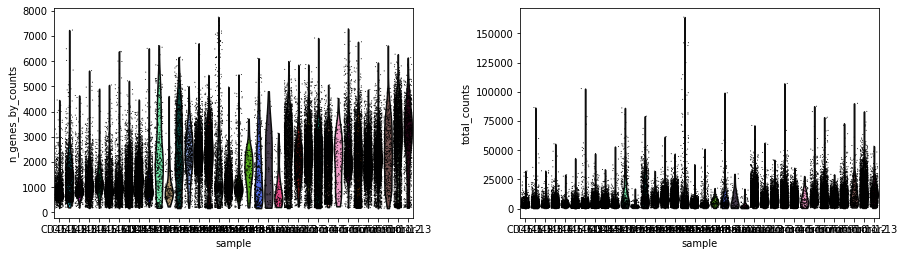

In [43]:

sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, multi_panel=True, groupby = 'sample')

In [32]:
adata.var

,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells
MT-RNR1,69274,13.393212,13.250266,1069515.0,69274
MT-TV,4317,0.073646,94.593952,5881.0,4317
MT-RNR2,76801,69.028328,3.824432,5512257.0,76801
MT-ND1,75360,28.713655,5.628952,2292929.0,75360
MT-TM,2994,0.044343,96.250704,3541.0,2994
...,...,...,...,...,...
7SK.1,427,0.007864,99.465281,628.0,427
VTRNA1-3,5028,0.124964,93.703588,9979.0,5028
DOHH,6364,0.087659,92.030555,7000.0,6364
U1.11,1762,0.029240,97.793501,2335.0,1762


In [33]:
# save normalized counts in raw slot.
adata.raw = adata


In [34]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)


normalizing by total count per cell
    finished (0:00:05): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [35]:
sc.pp.log1p(adata)


In [36]:
adata


AnnData object with n_obs × n_vars = 79855 × 10085
    obs: 'type', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'n_counts', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'sample_colors', 'log1p'

In [37]:
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

computing PCA
    with n_comps=50
    finished (0:00:30)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:31)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:55)


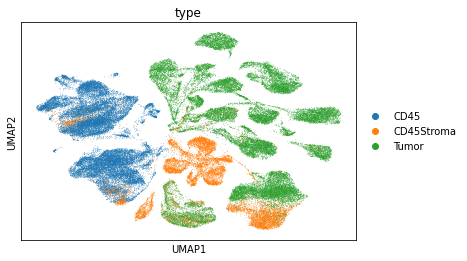

In [39]:
sc.pl.umap(adata, color=['type'])


Before batch correct, the groups of cells still look well separated based on cell types.  

비록 한꺼번에 정확히 모이지는 않았지만 다른 종류의 세포들은 적당히 구분되어 보인다.   

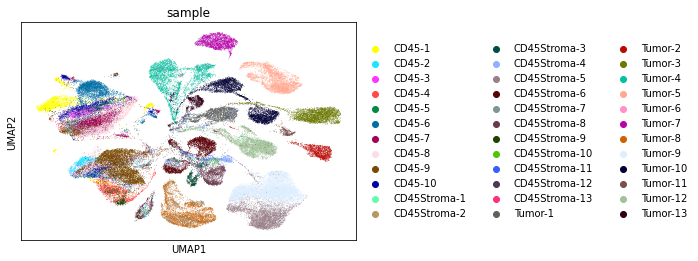

In [41]:
sc.pl.umap(adata, color=['sample'])


sample data file 별로 구분 